In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

import week7_utils as W7utils
%matplotlib inline

In [ ]:
import sklearn.datasets
irisX, irisy = sklearn.datasets.load_iris(return_X_y=True)
title="Scatterplots of 2D slices through the 4D Iris data"

iris_features= ("sepal_length", "sepal_width", "petal_length", "petal_width")
iris_names= ['setosa','versicolor','virginica']
W7utils.show_scatterplot_matrix(irisX,irisy,iris_features,title)

In [ ]:
class simple_1NN:
    def __init__(self, verbose=True):
        self.distance = W7utils.euclidean_distance
        self.K = 1
        self.verbose = verbose

    def fit(self, X, y):
        self.numTrainingItems = X.shape[0]
        self.numFeatures = X.shape[1]
        self.modelX = X
        self.modelY = y
        self.labelsPresent = np.unique(self.modelY)
        if self.verbose:
            print(f"There are {self.numTrainingItems} training examples, each described by")
            print(f"self.modelX is a 2D array of shape {self.modelX.shape}")
            print(f"self.modelY is a list with {len(self.modelY)} entries, each being one o")

    def predict(self, newItems):
        numToPredict = newItems.shape[0]
        predictions = np.empty(numToPredict)

        for item in range(numToPredict):
            thisPrediction = self.predict_new_item(newItems[item])
            predictions[item] = thisPrediction

        return predictions

    def predict_new_item(self, newItem):
        distFromNewItem = np.zeros((self.numTrainingItems))
        for stored_example in range(self.numTrainingItems):
            distFromNewItem[stored_example] = self.distance(newItem, self.modelX[stored_example])

        closest = 0
        for stored_example in range(0, self.numTrainingItems):
            if distFromNewItem[stored_example] < distFromNewItem[closest]:
                closest = stored_example

        labelOfClosest = self.modelY[closest]
        return labelOfClosest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
irisX, irisy = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)

# Assuming W7utils.euclidean_distance is defined
class simple_1NN:
    def __init__(self, verbose=True):
        self.distance = W7utils.euclidean_distance
        self.K = 1
        self.verbose = verbose

    def fit(self, X, y):
        self.numTrainingItems = X.shape[0]
        self.numFeatures = X.shape[1]
        self.modelX = X
        self.modelY = y
        self.labelsPresent = np.unique(self.modelY)
        if self.verbose:
            print(f"There are {self.numTrainingItems} training examples, each described by")
            print(f"self.modelX is a 2D array of shape {self.modelX.shape}")
            print(f"self.modelY is a list with {len(self.modelY)} entries, each being one of the labels associated with the training examples")

    def predict(self, newItems):
        numToPredict = newItems.shape[0]
        predictions = np.empty(numToPredict)

        for item in range(numToPredict):
            thisPrediction = self.predict_new_item(newItems[item])
            predictions[item] = thisPrediction

        return predictions

    def predict_new_item(self, newItem):
        distFromNewItem = np.zeros((self.numTrainingItems))
        for stored_example in range(self.numTrainingItems):
            distFromNewItem[stored_example] = self.distance(newItem, self.modelX[stored_example])

        closest = 0
        for stored_example in range(0, self.numTrainingItems):
            if distFromNewItem[stored_example] < distFromNewItem[closest]:
                closest = stored_example

        labelOfClosest = self.modelY[closest]
        return labelOfClosest

# Create and fit the model
myKNNmodel = simple_1NN()
myKNNmodel.fit(X_train, y_train)

# Predict on the test set
y_pred = myKNNmodel.predict(X_test)

# Print the predicted labels
print(y_pred)


In [ ]:
print ( (y_test==y_pred))
accuracy = 100* ( y_test == y_pred).sum() / y_test.shape[0]
print(f"Overall Accuracy = {accuracy} %")
confusionMatrix = np.zeros((3,3),int)
for i in range(50):
    actual = int(y_test[i])
    predicted = int(y_pred[i])
    confusionMatrix[actual][predicted] += 1
print(confusionMatrix)
#and here's sklearn's built-in method
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels= iris_names )

In [ ]:
# Assuming the previous code and definitions are already present

# Extract petal features from the training data
petals = X_train[:, 2:4]

# Fit the model on petal features
myKNNmodel.fit(petals, y_train)

# Predict using the model on petal features from the test set
y_pred = myKNNmodel.predict(X_test[:, 2:4])

# Calculate accuracy
accuracy = 100 * (y_test == y_pred).sum() / y_test.shape[0]
print(f"Overall Accuracy in 2D = {accuracy:.2f} %")

# Assuming you have the necessary imports and definitions
title = "1-Nearest Neighbour on petal features"
W7utils.PlotDecisionSurface(petals, y_train, myKNNmodel, title, iris_features[2:4], stepSize=0.01)


In [4]:
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
irisX, irisy = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)

class simple_KNN:
    def __init__(self, K=1, verbose=True):
        self.distance = self.euclidean_distance
        self.K = K
        self.verbose = verbose

    def fit(self, X, y):
        self.numTrainingItems = X.shape[0]
        self.numFeatures = X.shape[1]
        self.modelX = X
        self.modelY = y
        self.labelsPresent = np.unique(self.modelY)
        if self.verbose:
            print(f"There are {self.numTrainingItems} training examples, each described by")
            print(f"self.modelX is a 2D array of shape {self.modelX.shape}")
            print(f"self.modelY is a list with {len(self.modelY)} entries, each being one of the labels associated with the training examples")

    def predict(self, newItems):
        numToPredict = newItems.shape[0]
        predictions = np.empty(numToPredict)
        for item in range(numToPredict):
            thisPrediction = self.predict_new_item(newItems[item])
            predictions[item] = thisPrediction
        return predictions
    
    def predict_new_item(self, newItem):
        distFromNewItem = np.zeros((self.numTrainingItems))
        
        for stored_example in range(self.numTrainingItems):
            distFromNewItem[stored_example] = self.distance(newItem, self.modelX[stored_example])

        # Step 2: Get indexes of the k nearest neighbours for our new item
        closestK = self.get_ids_of_k_closest(self.K, distFromNewItem)

        labelcounts = np.zeros(len(self.labelsPresent))
        for k in range(self.K):
            thisindex = closestK[k]
            thislabel = self.modelY[thisindex]
            labelcounts[thislabel] += 1
        thisPrediction = np.argmax(labelcounts)
        return thisPrediction
        
    def euclidean_distance(self, item1, item2):
        assert item1.shape[0] == item2.shape[0]
        distance = 0.0
        for feature in range(item1.shape[0]):
            difference = item1[feature] - item2[feature]
            distance = distance + difference * difference
        return math.sqrt(distance)
    
    def get_ids_of_k_closest(self, K, distFromNewItem):
        sorted_indices = np.argsort(distFromNewItem)
        closestK = sorted_indices[:K]
        return closestK
    
# Create and fit the model
myKNNmodel = simple_KNN()
myKNNmodel.fit(X_train, y_train)

There are 100 training examples, each described by
self.modelX is a 2D array of shape (100, 4)
self.modelY is a list with 100 entries, each being one of the labels associated with the training examples


In [6]:
# Predict on the test set
y_pred = myKNNmodel.predict(X_test)

# Print the predicted labels
print("Predicted Labels:", y_pred)

# Calculate confusion matrix
confusion_matrix = np.zeros((3, 3))  # Assuming you have 3 classes
for true_label, pred_label in zip(y_test, y_pred):
    confusion_matrix[int(true_label)][int(pred_label)] += 1

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Predicted Labels: [1. 0. 2. 2. 2. 0. 1. 2. 1. 0. 0. 1. 0. 1. 0. 1. 1. 2. 0. 1. 1. 0. 1. 2.
 1. 2. 0. 1. 1. 1. 2. 2. 0. 1. 0. 1. 1. 0. 0. 2. 2. 0. 2. 1. 2. 2. 1. 0.
 0. 1.]
Confusion Matrix:
[[16.  0.  0.]
 [ 0. 17.  0.]
 [ 0.  3. 14.]]


In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
irisX, irisy = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)

# Experiment with different parameters
max_depth_values = [None, 3, 5, 7]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Create and fit the decision tree
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)

            # Predict on the test set
            y_pred = clf.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Print results
            print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf} - Accuracy: {accuracy:.2f}")

max_depth=None, min_samples_split=2, min_samples_leaf=1 - Accuracy: 0.92
max_depth=None, min_samples_split=2, min_samples_leaf=2 - Accuracy: 0.92
max_depth=None, min_samples_split=2, min_samples_leaf=4 - Accuracy: 0.92
max_depth=None, min_samples_split=5, min_samples_leaf=1 - Accuracy: 0.92
max_depth=None, min_samples_split=5, min_samples_leaf=2 - Accuracy: 0.92
max_depth=None, min_samples_split=5, min_samples_leaf=4 - Accuracy: 0.92
max_depth=None, min_samples_split=10, min_samples_leaf=1 - Accuracy: 0.94
max_depth=None, min_samples_split=10, min_samples_leaf=2 - Accuracy: 0.94
max_depth=None, min_samples_split=10, min_samples_leaf=4 - Accuracy: 0.94
max_depth=3, min_samples_split=2, min_samples_leaf=1 - Accuracy: 0.94
max_depth=3, min_samples_split=2, min_samples_leaf=2 - Accuracy: 0.94
max_depth=3, min_samples_split=2, min_samples_leaf=4 - Accuracy: 0.94
max_depth=3, min_samples_split=5, min_samples_leaf=1 - Accuracy: 0.94
max_depth=3, min_samples_split=5, min_samples_leaf=2 - Accur

<Figure size 800x600 with 0 Axes>

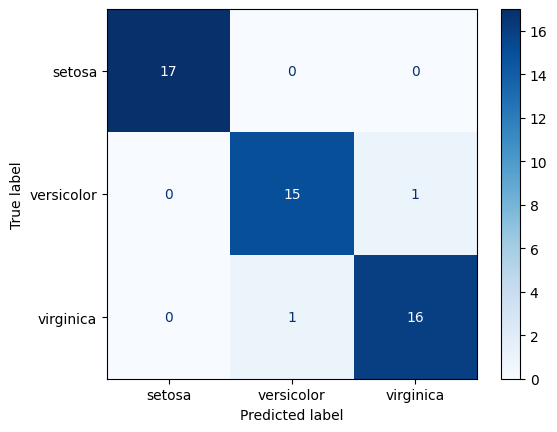

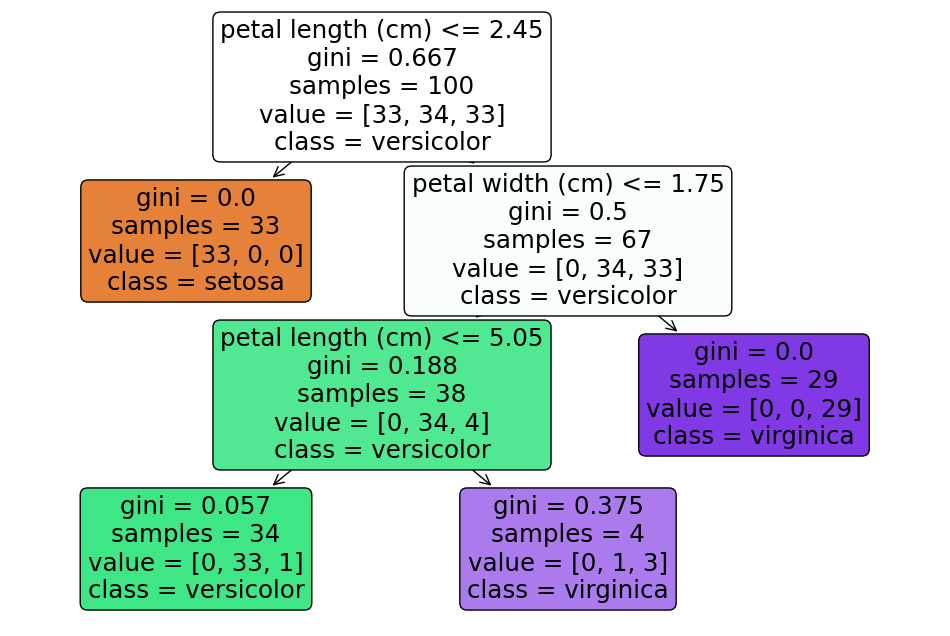

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Load iris dataset and split into train:test
iris = load_iris()
irisX = iris.data
irisy = iris.target
X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)

# Experiment with changing these values
depth = 3
minsplit = 2
minleaf = 1

model = DecisionTreeClassifier(random_state=1234, max_depth=depth, min_samples_split=minsplit, min_samples_leaf=minleaf)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names.tolist(), filled=True, rounded=True)
plt.show()


In [ ]:
import numpy as np
import math

class simple_KNN:
    def __init__(self, K=1, verbose=False):
        self.distance = self.euclidean_distance
        self.K = K
        self.verbose = verbose

    def fit(self, X, y):
        self.modelX = X
        self.modelY = y
        self.labelsPresent = np.unique(self.modelY)
        if self.verbose:
            print(f"Number of training examples: {len(self.modelX)}")
            print(f"Number of features: {self.modelX.shape[1]}")
            print(f"Labels present: {self.labelsPresent}")

    def predict(self, newItems):
        numToPredict = newItems.shape[0]
        predictions = np.empty(numToPredict)
        for item in range(numToPredict):
            thisPrediction = self.predict_new_item(newItems[item])
            predictions[item] = thisPrediction
        return predictions
    
    def predict_new_item(self, newItem):
        distFromNewItem = np.zeros((len(self.modelX)))
        
        for stored_example in range(len(self.modelX)):
            distFromNewItem[stored_example] = self.distance(newItem, self.modelX[stored_example])

        closestK = self.get_ids_of_k_closest(distFromNewItem, self.K)

        labelcounts = np.zeros(len(self.labelsPresent))
        for k in range(self.K):
            thisindex = closestK[k]
            thislabel = self.modelY[thisindex]
            labelcounts[thislabel] += 1
        thisPrediction = np.argmax(labelcounts)
        return thisPrediction
        
    def euclidean_distance(self, item1, item2):
        assert item1.shape[0] == item2.shape[0]
        distance = 0.0
        for feature in range(item1.shape[0]):
            difference = item1[feature] - item2[feature]
            distance = distance + difference * difference
        return math.sqrt(distance)
    
    def get_ids_of_k_closest(self, distFromNewItem, K):
        sorted_indices = np.argsort(distFromNewItem)
        closestK = sorted_indices[:K]
        return closestK